# 2.3 Skills/Wrangling with 🐼

In this notebook, we will focus on one skill in data analysis, namely the ability to add select, aggregate and transform data in a dataframe.

### Imports

In [1]:
import pandas as pd

### Load dataset

Let's read in a CSV file containing an export of [Elon Musk's tweets](https://twitter.com/elonmusk), exported from Twitter's API. 

In [2]:
dataset_path = '../data/musk_tweets/elonmusk_tweets.csv'
df = pd.read_csv(dataset_path)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2819 entries, 0 to 2818
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   id          2819 non-null   int64 
 1   created_at  2819 non-null   object
 2   text        2819 non-null   object
dtypes: int64(1), object(2)
memory usage: 66.2+ KB


In [4]:
df.head()

,id,created_at,text
0,849636868052275200,2017-04-05 14:56:29,b'And so the robots spared humanity ... https:...
1,848988730585096192,2017-04-03 20:01:01,"b""@ForIn2020 @waltmossberg @mims @defcon_5 Exa..."
2,848943072423497728,2017-04-03 16:59:35,"b'@waltmossberg @mims @defcon_5 Et tu, Walt?'"
3,848935705057280001,2017-04-03 16:30:19,b'Stormy weather in Shortville ...'
4,848416049573658624,2017-04-02 06:05:23,"b""@DaveLeeBBC @verge Coal is dying due to nat ..."


In [5]:
df.set_index('id', drop=True, inplace=True)

In [6]:
df

,created_at,text
id,,
849636868052275200,2017-04-05 14:56:29,b'And so the robots spared humanity ... https:...
848988730585096192,2017-04-03 20:01:01,"b""@ForIn2020 @waltmossberg @mims @defcon_5 Exa..."
848943072423497728,2017-04-03 16:59:35,"b'@waltmossberg @mims @defcon_5 Et tu, Walt?'"
848935705057280001,2017-04-03 16:30:19,b'Stormy weather in Shortville ...'
848416049573658624,2017-04-02 06:05:23,"b""@DaveLeeBBC @verge Coal is dying due to nat ..."
...,...,...
142881284019060736,2011-12-03 08:22:07,b'That was a total non sequitur btw'
142880871391838208,2011-12-03 08:20:28,"b'Great Voltaire quote, arguably better than T..."
142188458125963264,2011-12-01 10:29:04,b'I made the volume on the Model S http://t.co...


Let's give this dataset a bit more structure:
- the `id` column can be transformed into the dataframe's index, thus enabling us e.g. to select a tweet by id;
- `created_at` contains a timestamp, thus it can easily be converted into a `datetime` value
- but what's going on with the text column ??

In [7]:
df.created_at = pd.to_datetime(df.created_at)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2819 entries, 849636868052275200 to 15434727182
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   created_at  2819 non-null   datetime64[ns]
 1   text        2819 non-null   object        
dtypes: datetime64[ns](1), object(1)
memory usage: 66.1+ KB


### Selection

#### Renaming columns

An operation on dataframes that you'll find yourself doing very often is to rename the columns. 

The first way of renaming columns is by manipulating directly the dataframe's index via the `columns` property.

We can change the column names by assigning to `columns` a list having as values the new column names.

**NB**: the size of the list and new number of colums must match!

In [9]:
df.columns

Index(['created_at', 'text'], dtype='object')

In [10]:
# let's check that the change did take place
df.head()

,created_at,text
id,,
849636868052275200,2017-04-05 14:56:29,b'And so the robots spared humanity ... https:...
848988730585096192,2017-04-03 20:01:01,"b""@ForIn2020 @waltmossberg @mims @defcon_5 Exa..."
848943072423497728,2017-04-03 16:59:35,"b'@waltmossberg @mims @defcon_5 Et tu, Walt?'"
848935705057280001,2017-04-03 16:30:19,b'Stormy weather in Shortville ...'
848416049573658624,2017-04-02 06:05:23,"b""@DaveLeeBBC @verge Coal is dying due to nat ..."


The second way of renaming colums is to use the method `rename()` of a dataframe. The `columns` parameter takes a dictionary of mappings between old and new column names.

```python
mapping_dict = {
    "old_column_name": "new_column_name"
}
```

In [11]:
# let's change column `tweet` => `text`
df = df.rename(columns={"tweet": "text"})

In [12]:
df.head()

,created_at,text
id,,
849636868052275200,2017-04-05 14:56:29,b'And so the robots spared humanity ... https:...
848988730585096192,2017-04-03 20:01:01,"b""@ForIn2020 @waltmossberg @mims @defcon_5 Exa..."
848943072423497728,2017-04-03 16:59:35,"b'@waltmossberg @mims @defcon_5 Et tu, Walt?'"
848935705057280001,2017-04-03 16:30:19,b'Stormy weather in Shortville ...'
848416049573658624,2017-04-02 06:05:23,"b""@DaveLeeBBC @verge Coal is dying due to nat ..."


**Question**: in which cases is it more convenient to use the second method over the first?

#### Selecting columns

In [13]:
# this selects one single column and returns as a Series
df["created_at"].head()

id
849636868052275200   2017-04-05 14:56:29
848988730585096192   2017-04-03 20:01:01
848943072423497728   2017-04-03 16:59:35
848935705057280001   2017-04-03 16:30:19
848416049573658624   2017-04-02 06:05:23
Name: created_at, dtype: datetime64[ns]

In [14]:
type(df["created_at"])

pandas.core.series.Series

In [15]:
# whereas this syntax selects one single column
# but returns a Dataframe
df[["created_at"]].head()

,created_at
id,
849636868052275200,2017-04-05 14:56:29
848988730585096192,2017-04-03 20:01:01
848943072423497728,2017-04-03 16:59:35
848935705057280001,2017-04-03 16:30:19
848416049573658624,2017-04-02 06:05:23


In [16]:
type(df[["created_at"]])

pandas.core.frame.DataFrame

### Transformation


The two main functions used to manipulate and transform values in a dataframe are:
- `map()`
- `apply()`

In this section we'll be using both to enrich our datasets with useful information (useful for exploration, for later visualizations, etc.).

#### Add link to original tweet

The `map()` method can be called on a column, as well as on the dataframe's index.

When passed as a parameter to `map`, the functional programming-stlye function `lambda` can be used to transform any value from that column into another one.   

In [17]:
df.index

Int64Index([849636868052275200, 848988730585096192, 848943072423497728,
            848935705057280001, 848416049573658624, 848415731502923777,
            848415356263702528, 848398971139629057, 848244577521647616,
            848243350993895424,
            ...
            149441101684686848, 149439686702661632, 149436471764459520,
            149435658115612672, 143171132814671872, 142881284019060736,
            142880871391838208, 142188458125963264, 142179928203460608,
                   15434727182],
           dtype='int64', name='id', length=2819)

In [18]:
df['tweet_link'] = df.index.map(lambda x: f'https://twitter.com/i/web/status/{x}')

In [19]:
pd.set_option("display.max_colwidth", 10000)

def make_clickable(val):
    # target _blank to open new window
    return '<a target="_blank" href="{}">{}</a>'.format(val, val)

df.head().style.format({'tweet_link': make_clickable})

# to apply the style to the entire dataframe just remove
# `.head` from the line above

,created_at,text,tweet_link
id,,,
849636868052275200,2017-04-05 14:56:29,b'And so the robots spared humanity ... https://t.co/v7JUJQWfCv',https://twitter.com/i/web/status/849636868052275200
848988730585096192,2017-04-03 20:01:01,"b""@ForIn2020 @waltmossberg @mims @defcon_5 Exactly. Tesla is absurdly overvalued if based on the past, but that's irr\xe2\x80\xa6 https://t.co/qQcTqkzgMl""",https://twitter.com/i/web/status/848988730585096192
848943072423497728,2017-04-03 16:59:35,"b'@waltmossberg @mims @defcon_5 Et tu, Walt?'",https://twitter.com/i/web/status/848943072423497728
848935705057280000,2017-04-03 16:30:19,b'Stormy weather in Shortville ...',https://twitter.com/i/web/status/848935705057280001
848416049573658624,2017-04-02 06:05:23,"b""@DaveLeeBBC @verge Coal is dying due to nat gas fracking. It's basically dead.""",https://twitter.com/i/web/status/848416049573658624


#### Add colums with mentions

In [86]:
import re
import pdb # python standard debugger

def find_mentions(tweet_text):
    handle_regexp = r'@[a-zA-Z0-9_]{1,15}'
    pdb.set_trace()
    return ", ".join(re.findall(handle_regexp, tweet_text))

In [88]:
df.text.apply(find_mentions)

> /var/folders/8s/rnkbnf8549qclh_gcb_qj_yw0000gv/T/ipykernel_98184/3615496706.py(7)find_mentions()
      3 
      4 def find_mentions(tweet_text):
      5     handle_regexp = r'@[a-zA-Z0-9_]{1,15}'
      6     pdb.set_trace()
----> 7     return ", ".join(re.findall(handle_regexp, tweet_text))



ipdb>  c


> /var/folders/8s/rnkbnf8549qclh_gcb_qj_yw0000gv/T/ipykernel_98184/3615496706.py(7)find_mentions()
      3 
      4 def find_mentions(tweet_text):
      5     handle_regexp = r'@[a-zA-Z0-9_]{1,15}'
      6     pdb.set_trace()
----> 7     return ", ".join(re.findall(handle_regexp, tweet_text))



ipdb>  c


> /var/folders/8s/rnkbnf8549qclh_gcb_qj_yw0000gv/T/ipykernel_98184/3615496706.py(7)find_mentions()
      3 
      4 def find_mentions(tweet_text):
      5     handle_regexp = r'@[a-zA-Z0-9_]{1,15}'
      6     pdb.set_trace()
----> 7     return ", ".join(re.findall(handle_regexp, tweet_text))



ipdb>  q


In [22]:
df['tweet_mentions'] = df.text.apply(find_mentions)

In [23]:
df['n_mentions'] = df.tweet_mentions.map(lambda x: len(x.split(', ')))

In [24]:
df.head()

,created_at,text,tweet_link,tweet_mentions,n_mentions
id,,,,,
849636868052275200,2017-04-05 14:56:29,b'And so the robots spared humanity ... https://t.co/v7JUJQWfCv',https://twitter.com/i/web/status/849636868052275200,,1
848988730585096192,2017-04-03 20:01:01,"b""@ForIn2020 @waltmossberg @mims @defcon_5 Exactly. Tesla is absurdly overvalued if based on the past, but that's irr\xe2\x80\xa6 https://t.co/qQcTqkzgMl""",https://twitter.com/i/web/status/848988730585096192,"@ForIn2020, @waltmossberg, @mims, @defcon_5",4
848943072423497728,2017-04-03 16:59:35,"b'@waltmossberg @mims @defcon_5 Et tu, Walt?'",https://twitter.com/i/web/status/848943072423497728,"@waltmossberg, @mims, @defcon_5",3
848935705057280001,2017-04-03 16:30:19,b'Stormy weather in Shortville ...',https://twitter.com/i/web/status/848935705057280001,,1
848416049573658624,2017-04-02 06:05:23,"b""@DaveLeeBBC @verge Coal is dying due to nat gas fracking. It's basically dead.""",https://twitter.com/i/web/status/848416049573658624,"@DaveLeeBBC, @verge",2


#### Add column with week day

In [25]:
df["week_day_name"] = df.created_at.dt.day_name()

In [26]:
df["week_day"] = df.created_at.dt.weekday

In [27]:
df.head(3)

,created_at,text,tweet_link,tweet_mentions,n_mentions,week_day_name,week_day
id,,,,,,,
849636868052275200,2017-04-05 14:56:29,b'And so the robots spared humanity ... https://t.co/v7JUJQWfCv',https://twitter.com/i/web/status/849636868052275200,,1,Wednesday,2
848988730585096192,2017-04-03 20:01:01,"b""@ForIn2020 @waltmossberg @mims @defcon_5 Exactly. Tesla is absurdly overvalued if based on the past, but that's irr\xe2\x80\xa6 https://t.co/qQcTqkzgMl""",https://twitter.com/i/web/status/848988730585096192,"@ForIn2020, @waltmossberg, @mims, @defcon_5",4,Monday,0
848943072423497728,2017-04-03 16:59:35,"b'@waltmossberg @mims @defcon_5 Et tu, Walt?'",https://twitter.com/i/web/status/848943072423497728,"@waltmossberg, @mims, @defcon_5",3,Monday,0


###  Selecting rows

Filtering rows in `pandas` is done by means of `[ ]`, which can contain the row number as well as a condition for the selection.

In [28]:
df[0:2]

,created_at,text,tweet_link,tweet_mentions,n_mentions,week_day_name,week_day
id,,,,,,,
849636868052275200,2017-04-05 14:56:29,b'And so the robots spared humanity ... https://t.co/v7JUJQWfCv',https://twitter.com/i/web/status/849636868052275200,,1,Wednesday,2
848988730585096192,2017-04-03 20:01:01,"b""@ForIn2020 @waltmossberg @mims @defcon_5 Exactly. Tesla is absurdly overvalued if based on the past, but that's irr\xe2\x80\xa6 https://t.co/qQcTqkzgMl""",https://twitter.com/i/web/status/848988730585096192,"@ForIn2020, @waltmossberg, @mims, @defcon_5",4,Monday,0


In [29]:
df.shape

(2819, 7)

In [30]:
# equivalent of `df.query('n_mentions > 0')`

len(df[df.n_mentions > 0])

2819

In [31]:
df[df.n_mentions >= 0].shape

(2819, 7)

#### Strings

In [32]:
df[df.week_day_name == 'Saturday'].shape

(426, 7)

In [33]:
df[df.week_day_name.str.startswith('S')].shape

(848, 7)

#### Multiple conditions

In [34]:
# AND condition with `&`

df[
    (df.week_day_name == 'Saturday') & (df.n_mentions == 0)
].shape

(0, 7)

In [35]:
# equivalent expression with `query()`

df.query("week_day_name == 'Saturday' and n_mentions == 0").shape

(0, 7)

In [36]:
# OR condition with `|`

df[
    (df.week_day_name == 'Saturday') | (df.n_mentions == 0)
].shape

(426, 7)

#### Add column with day hour

In [37]:
df.created_at.dt?

Type:        DatetimeProperties
String form: <pandas.core.indexes.accessors.DatetimeProperties object at 0x1208bb430>
File:        ~/.pyenv/versions/3.10.0/envs/ada-dhoxss-2022/lib/python3.10/site-packages/pandas/core/indexes/accessors.py
Docstring:  
Accessor object for datetimelike properties of the Series values.

Examples
--------
>>> seconds_series = pd.Series(pd.date_range("2000-01-01", periods=3, freq="s"))
>>> seconds_series
0   2000-01-01 00:00:00
1   2000-01-01 00:00:01
2   2000-01-01 00:00:02
dtype: datetime64[ns]
>>> seconds_series.dt.second
0    0
1    1
2    2
dtype: int64

>>> hours_series = pd.Series(pd.date_range("2000-01-01", periods=3, freq="h"))
>>> hours_series
0   2000-01-01 00:00:00
1   2000-01-01 01:00:00
2   2000-01-01 02:00:00
dtype: datetime64[ns]
>>> hours_series.dt.hour
0    0
1    1
2    2
dtype: int64

>>> quarters_series = pd.Series(pd.date_range("2000-01-01", periods=3, freq="q"))
>>> quarters_series
0   2000-03-31
1   2000-06-30
2   2000-09-30
dtype: d

In [38]:
df.created_at.dt.hour.head()

id
849636868052275200    14
848988730585096192    20
848943072423497728    16
848935705057280001    16
848416049573658624     6
Name: created_at, dtype: int64

In [39]:
df["day_hour"] = df.created_at.dt.hour

In [40]:
display_cols = ['created_at', 'week_day', 'day_hour']
df[display_cols].head(4)

,created_at,week_day,day_hour
id,,,
849636868052275200,2017-04-05 14:56:29,2,14
848988730585096192,2017-04-03 20:01:01,0,20
848943072423497728,2017-04-03 16:59:35,0,16
848935705057280001,2017-04-03 16:30:19,0,16


### Aggregation

(Figure taken from W. Mckinney's *Python for Data Analysis* 2013, p. 252)

<img src='figures/groupby-mechanics.png' width='600px'>

In [41]:
df.agg({'n_mentions': ['min', 'max', 'sum']})

,n_mentions
min,1
max,6
sum,3422


#### Grouping

In [42]:
df.groupby?

Signature:
df.groupby(
    by=None,
    axis: 'Axis' = 0,
    level: 'Level | None' = None,
    as_index: 'bool' = True,
    sort: 'bool' = True,
    group_keys: 'bool' = True,
    squeeze: 'bool | lib.NoDefault' = <no_default>,
    observed: 'bool' = False,
    dropna: 'bool' = True,
) -> 'DataFrameGroupBy'
Docstring:
Group DataFrame using a mapper or by a Series of columns.

A groupby operation involves some combination of splitting the
object, applying a function, and combining the results. This can be
used to group large amounts of data and compute operations on these
groups.

Parameters
----------
by : mapping, function, label, or list of labels
    Used to determine the groups for the groupby.
    If ``by`` is a function, it's called on each value of the object's
    index. If a dict or Series is passed, the Series or dict VALUES
    will be used to determine the groups (the Series' values are first
    aligned; see ``.align()`` method). If a list or ndarray of length
    equal t

In [43]:
grp_by_day = df.groupby('week_day')

In [44]:
type(grp_by_day)

pandas.core.groupby.generic.DataFrameGroupBy

The object returned by `gropuby` is a `DataFrameGroupBy` **not** a normal `DataFrame`.

However, some methods of the latter work also on the former, e.g. `head` and `tail`

In [45]:
# the head of a DataFrameGroupBy consists of the first
# n records for each group (see `help(grp_by_day.head)`)

grp_by_day.head(1)

,created_at,text,tweet_link,tweet_mentions,n_mentions,week_day_name,week_day,day_hour
id,,,,,,,,
849636868052275200,2017-04-05 14:56:29,b'And so the robots spared humanity ... https://t.co/v7JUJQWfCv',https://twitter.com/i/web/status/849636868052275200,,1,Wednesday,2,14
848988730585096192,2017-04-03 20:01:01,"b""@ForIn2020 @waltmossberg @mims @defcon_5 Exactly. Tesla is absurdly overvalued if based on the past, but that's irr\xe2\x80\xa6 https://t.co/qQcTqkzgMl""",https://twitter.com/i/web/status/848988730585096192,"@ForIn2020, @waltmossberg, @mims, @defcon_5",4,Monday,0,20
848416049573658624,2017-04-02 06:05:23,"b""@DaveLeeBBC @verge Coal is dying due to nat gas fracking. It's basically dead.""",https://twitter.com/i/web/status/848416049573658624,"@DaveLeeBBC, @verge",2,Sunday,6,6
848244577521647616,2017-04-01 18:44:01,"b""Why did we waste so much time developing silly rockets? Damn you, aliens! So obtuse! You have all this crazy tech, but can't speak English!?""",https://twitter.com/i/web/status/848244577521647616,,1,Saturday,5,18
847958571895619584,2017-03-31 23:47:32,b'@BadAstronomer We can def bring it back like Dragon. Just a question of how much weight we need to add.',https://twitter.com/i/web/status/847958571895619584,@BadAstronomer,1,Friday,4,23
847594208219336705,2017-03-30 23:39:41,b'Incredibly proud of the SpaceX team for achieving this milestone in space! Next goal is reflight within 24 hours.',https://twitter.com/i/web/status/847594208219336705,,1,Thursday,3,23
846772378067648513,2017-03-28 17:14:01,b'@danahull Very few. We have yet to do a China (or Europe) launch of Model 3.',https://twitter.com/i/web/status/846772378067648513,@danahull,1,Tuesday,1,17


`agg` is used to pass an aggregation function to be applied to each group resulting from `groupby`.

In [46]:
# here we are interested in how many tweets
# there are for each group, so we pass `len()`

grp_by_day.agg(len)

,created_at,text,tweet_link,tweet_mentions,n_mentions,week_day_name,day_hour
week_day,,,,,,,
0,315,315,315,315,315,315,315
1,385,385,385,385,385,385,385
2,380,380,380,380,380,380,380
3,361,361,361,361,361,361,361
4,530,530,530,530,530,530,530
5,426,426,426,426,426,426,426
6,422,422,422,422,422,422,422


In [47]:
# however, we are not interested in having the count for all
# columns. rather we want to create a new dataframe with renamed
# column names

grp_by_day.agg({'text': len}).rename({'text': 'tweet_count'}, axis='columns')

,tweet_count
week_day,
0,315
1,385
2,380
3,361
4,530
5,426
6,422


##### By label (column)

Previously we've added a column indicating on which day of the week a given tweet appeared.

In [48]:
grpby_result_as_series = df.groupby('day_hour')['text'].count()

In [49]:
grpby_result_as_series.head()

day_hour
0    144
1    183
2    119
3    104
4     98
Name: text, dtype: int64

In [50]:
grpby_result_as_df = df.groupby('day_hour')[['text']]\
    .count()\
    .rename({'text': 'count'}, axis='columns')

In [51]:
grpby_result_as_df.head()

,count
day_hour,
0,144
1,183
2,119
3,104
4,98


##### By series or dict

In [52]:
df.groupby?

Signature:
df.groupby(
    by=None,
    axis: 'Axis' = 0,
    level: 'Level | None' = None,
    as_index: 'bool' = True,
    sort: 'bool' = True,
    group_keys: 'bool' = True,
    squeeze: 'bool | lib.NoDefault' = <no_default>,
    observed: 'bool' = False,
    dropna: 'bool' = True,
) -> 'DataFrameGroupBy'
Docstring:
Group DataFrame using a mapper or by a Series of columns.

A groupby operation involves some combination of splitting the
object, applying a function, and combining the results. This can be
used to group large amounts of data and compute operations on these
groups.

Parameters
----------
by : mapping, function, label, or list of labels
    Used to determine the groups for the groupby.
    If ``by`` is a function, it's called on each value of the object's
    index. If a dict or Series is passed, the Series or dict VALUES
    will be used to determine the groups (the Series' values are first
    aligned; see ``.align()`` method). If a list or ndarray of length
    equal t

In [53]:
for group, rows in df.groupby(df.created_at.dt.day):
    print(group, type(rows))

1 <class 'pandas.core.frame.DataFrame'>
2 <class 'pandas.core.frame.DataFrame'>
3 <class 'pandas.core.frame.DataFrame'>
4 <class 'pandas.core.frame.DataFrame'>
5 <class 'pandas.core.frame.DataFrame'>
6 <class 'pandas.core.frame.DataFrame'>
7 <class 'pandas.core.frame.DataFrame'>
8 <class 'pandas.core.frame.DataFrame'>
9 <class 'pandas.core.frame.DataFrame'>
10 <class 'pandas.core.frame.DataFrame'>
11 <class 'pandas.core.frame.DataFrame'>
12 <class 'pandas.core.frame.DataFrame'>
13 <class 'pandas.core.frame.DataFrame'>
14 <class 'pandas.core.frame.DataFrame'>
15 <class 'pandas.core.frame.DataFrame'>
16 <class 'pandas.core.frame.DataFrame'>
17 <class 'pandas.core.frame.DataFrame'>
18 <class 'pandas.core.frame.DataFrame'>
19 <class 'pandas.core.frame.DataFrame'>
20 <class 'pandas.core.frame.DataFrame'>
21 <class 'pandas.core.frame.DataFrame'>
22 <class 'pandas.core.frame.DataFrame'>
23 <class 'pandas.core.frame.DataFrame'>
24 <class 'pandas.core.frame.DataFrame'>
25 <class 'pandas.core.fr

In [54]:
# here we pass the groups as a series
df.groupby(df.created_at.dt.day).agg({'text':len}).head()

,text
created_at,
1,107
2,107
3,114
4,97
5,117


In [55]:
# here we pass the groups as a series
df.groupby(df.created_at.dt.day)[['text']].count().head()

,text
created_at,
1,107
2,107
3,114
4,97
5,117


In [76]:
df.groupby(df.created_at.dt.hour)[['text']].count()

,text
created_at,
0,144
1,183
2,119
3,104
4,98
5,81
6,85
7,94
8,82


In [56]:
df.groupby(df.created_at.dt.hour)[['text']].count().head()

,text
created_at,
0,144
1,183
2,119
3,104
4,98


In [80]:
x = df.groupby(df.created_at.dt.hour)[['text']].count()

<AxesSubplot:xlabel='created_at'>

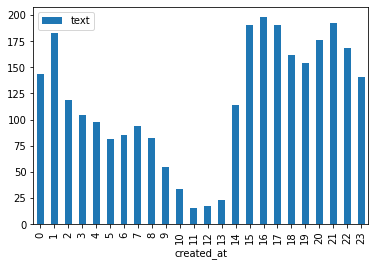

In [83]:
x.plot(kind='bar')

##### By multiple labels (columns)

In [67]:
df.head()

,created_at,text,tweet_link,tweet_mentions,n_mentions,week_day_name,week_day,day_hour
id,,,,,,,,
849636868052275200,2017-04-05 14:56:29,b'And so the robots spared humanity ... https://t.co/v7JUJQWfCv',https://twitter.com/i/web/status/849636868052275200,,1,Wednesday,2,14
848988730585096192,2017-04-03 20:01:01,"b""@ForIn2020 @waltmossberg @mims @defcon_5 Exactly. Tesla is absurdly overvalued if based on the past, but that's irr\xe2\x80\xa6 https://t.co/qQcTqkzgMl""",https://twitter.com/i/web/status/848988730585096192,"@ForIn2020, @waltmossberg, @mims, @defcon_5",4,Monday,0,20
848943072423497728,2017-04-03 16:59:35,"b'@waltmossberg @mims @defcon_5 Et tu, Walt?'",https://twitter.com/i/web/status/848943072423497728,"@waltmossberg, @mims, @defcon_5",3,Monday,0,16
848935705057280001,2017-04-03 16:30:19,b'Stormy weather in Shortville ...',https://twitter.com/i/web/status/848935705057280001,,1,Monday,0,16
848416049573658624,2017-04-02 06:05:23,"b""@DaveLeeBBC @verge Coal is dying due to nat gas fracking. It's basically dead.""",https://twitter.com/i/web/status/848416049573658624,"@DaveLeeBBC, @verge",2,Sunday,6,6


In [72]:
pd.set_option("display.max_rows", None, "display.max_columns", None)

In [68]:
# here we group based on the values of two columns
# instead of one

x = df.groupby(['week_day', 'day_hour'])[['text']].count()

In [73]:
x

text
week_day day_hour      
0        0           11
         1           23
         2           17
         3            7
         4           12
         5           18
         6           14
         7            5
         8            8
         9            6
         10           7
         12           2
         13           4
         14          11
         15          18
         16          29
         17          16
         18           9
         19          30
         20          21
         21          25
         22          11
         23          11
1        0           12
         1           18
         2           13
         3           23
         4           16
         5            9
         6           10
         7           13
         8           16
         9            4
         10           6
         11           1
         12           6
         13           1
         14          12
         15          33
         16          32
         17          25
         18          25
         19          20
         20          15
         21          36
         22          18
         23          21
2        0           19
         1           17
         2           15
         3           16
         4            7
         5            5
         6           18
         7           18
         8           12
         9            6
         10           6
         11           2
         12           1
         13           8
         14          20
         15          27
         16          36
         17          19
         18          16
         19          12
         20          23
         21          21
         22          22
         23          34
3        0           15
         1           20
         2            8
         3            7
         4           19
         5           12
         6            8
         7           19
         8           14
         9           13
         10           5
         11           2
         12           3
         14           7
         15          29
         16          22
         17          22
         18          19
         19          15
         20          28
         21          39
         22          17
         23          18
4        0           28
         1           29
         2           20
         3           20
         4           15
         5           17
         6           17
         7           27
         8           14
         9            5
         10           2
         11           1
         12           1
         13           2
         14          46
         15          46
         16          34
         17          35
         18          35
         19          27
         20          28
         21          18
         22          39
         23          24
5        0           34
         1           53
         2           31
         3           16
         4           20
         5           13
         6            8
         7            8
         8           14
         9           14
         10           5
         11           8
         12           2
         13           5
         14           8
         15          13
         16          21
         17          20
         18          20
         19          26
         20          25
         21          23
         22          23
         23          16
6        0           25
         1           23
         2           15
         3           15
         4            9
         5            7
         6           10
         7            4
         8            4
         9            7
         10           3
         11           1
         12           2
         13           3
         14          10
         15          24
         16          24
         17          53
         18          38
         19          24
         20          36
         21          30
         22          38
         23

#### Aggregation methods

**Summary**:

- `count`: Number of non-NA values
- `sum`: Sum of non-NA values
- `mean`: Mean of non-NA values
- `median`: Arithmetic median of non-NA values
- `std`, `var`: standard deviation and variance
- `min`, `max`: Minimum and maximum of non-NA values

They can be used on a single series:

In [60]:
df.n_mentions.max()

6

On the entire dataframe:

In [61]:
df.mean()

/var/folders/8s/rnkbnf8549qclh_gcb_qj_yw0000gv/T/ipykernel_98184/3698961737.py:1: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  df.mean()
/var/folders/8s/rnkbnf8549qclh_gcb_qj_yw0000gv/T/ipykernel_98184/3698961737.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.mean()


n_mentions     1.213906
week_day       3.196169
day_hour      12.782547
dtype: float64

Or also as aggregation functions within a groupby:

In [62]:
df.groupby('week_day').agg(
    {
        # each key in this dict specifies
        # a given column
        'n_mentions':[
            # the list contains aggregation functions
            # to be applied to this column
            'count',
            'mean',
            'min',
            'max',
            'std',
            'var'
        ]
    }
)

n_mentions                                      
              count      mean min max       std       var
week_day                                                 
0               315  1.282540   1   5  0.643077  0.413548
1               385  1.184416   1   6  0.590521  0.348715
2               380  1.168421   1   4  0.474192  0.224858
3               361  1.199446   1   4  0.531350  0.282333
4               530  1.245283   1   5  0.633222  0.400970
5               426  1.166667   1   5  0.497444  0.247451
6               422  1.251185   1   6  0.571231  0.326305

#### Sorting

To sort the values of  a dataframe we use its `sort_values` method:
- `by`: specifies the name of the column to be used for sorting
- `ascending` (default = `True`): specifies whether the sorting should be *ascending* (A-Z, 0-9) or `descending` (Z-A, 9-0) 

In [74]:
df.sort_values?

Signature:
df.sort_values(
    by,
    axis: 'Axis' = 0,
    ascending=True,
    inplace: 'bool' = False,
    kind: 'str' = 'quicksort',
    na_position: 'str' = 'last',
    ignore_index: 'bool' = False,
    key: 'ValueKeyFunc' = None,
)
Docstring:
Sort by the values along either axis.

Parameters
----------
        by : str or list of str
            Name or list of names to sort by.

            - if `axis` is 0 or `'index'` then `by` may contain index
              levels and/or column labels.
            - if `axis` is 1 or `'columns'` then `by` may contain column
              levels and/or index labels.
axis : {0 or 'index', 1 or 'columns'}, default 0
     Axis to be sorted.
ascending : bool or list of bool, default True
     Sort ascending vs. descending. Specify list for multiple sort
     orders.  If this is a list of bools, must match the length of
     the by.
inplace : bool, default False
     If True, perform operation in-place.
kind : {'quicksort', 'mergesort', 'heapsort'

In [63]:
df.sort_values(by='created_at', ascending=True).head()

,created_at,text,tweet_link,tweet_mentions,n_mentions,week_day_name,week_day,day_hour
id,,,,,,,,
15434727182,2010-06-04 18:31:57,"b'Please ignore prior tweets, as that was someone pretending to be me :) This is actually me.'",https://twitter.com/i/web/status/15434727182,,1,Friday,4,18
142179928203460608,2011-12-01 09:55:11,"b""Went to Iceland on Sat to ride bumper cars on ice! No, not the country, Vlad's rink in Van Nuys. Awesome family fun :) http://t.co/rBQXJ9IT""",https://twitter.com/i/web/status/142179928203460608,,1,Thursday,3,9
142188458125963264,2011-12-01 10:29:04,b'I made the volume on the Model S http://t.co/wMCnT53M go to 11. Now I just need to work in a miniature Stonehenge...',https://twitter.com/i/web/status/142188458125963264,,1,Thursday,3,10
142880871391838208,2011-12-03 08:20:28,"b'Great Voltaire quote, arguably better than Twain. Hearing news of his own death, Voltaire replied the reports were true, only premature.'",https://twitter.com/i/web/status/142880871391838208,,1,Saturday,5,8
142881284019060736,2011-12-03 08:22:07,b'That was a total non sequitur btw',https://twitter.com/i/web/status/142881284019060736,,1,Saturday,5,8


In [64]:
df.sort_values(by='n_mentions', ascending=False).head()

,created_at,text,tweet_link,tweet_mentions,n_mentions,week_day_name,week_day,day_hour
id,,,,,,,,
303244501957365760,2013-02-17 20:48:17,b'RT @LawrenceChanin: @TeslaRoadTrip @avantgame @TEDchris @elonmusk @nytimes \nThe driving public is the winner thanks to the efforts of ...',https://twitter.com/i/web/status/303244501957365760,"@LawrenceChanin, @TeslaRoadTrip, @avantgame, @TEDchris, @elonmusk, @nytimes",6,Sunday,6,20
752721031735812096,2016-07-12 04:27:33,"b""@kumailn @RealDaveBarton @JuddApatow @SiliconHBO @FredericLambert @MikeJudge can't wait to see the costume""",https://twitter.com/i/web/status/752721031735812096,"@kumailn, @RealDaveBarton, @JuddApatow, @SiliconHBO, @FredericLambert, @MikeJudge",6,Tuesday,1,4
845289977051148289,2017-03-24 15:03:29,b'@faultywarrior @matt_trulli @FredericLambert @TimShelton @JimPengelly Let me just go fetch my magic wand ...',https://twitter.com/i/web/status/845289977051148289,"@faultywarrior, @matt_trulli, @FredericLambert, @TimShelton, @JimPengelly",5,Friday,4,15
752719954219192320,2016-07-12 04:23:16,b'@RealDaveBarton @kumailn @JuddApatow @SiliconHBO @FredericLambert Only if I can play a monkey',https://twitter.com/i/web/status/752719954219192320,"@RealDaveBarton, @kumailn, @JuddApatow, @SiliconHBO, @FredericLambert",5,Tuesday,1,4
672792504895434753,2015-12-04 15:00:07,"b""RT @WSJLife: Supermodel @KarlieKloss blasts off to the future at @elonmusk's @spacex HQ https://t.co/PfE2bWcQwM @wsjmag https://t.co/zc7QM9\xe2\x80\xa6""",https://twitter.com/i/web/status/672792504895434753,"@WSJLife, @KarlieKloss, @elonmusk, @spacex, @wsjmag",5,Friday,4,15


### Save

Before continuing with the plotting, let's save our enhanced dataframe, so that we can come back to it without having to redo the same manipulations on it.

`pandas` provides a number of handy functions to export dataframes in a variety of formats.

Here we use `to_pickle` to serialize the dataframe into a binary format, by using behind the scenes Python's `pickle` library. 

In [65]:
df.to_pickle("./musk_tweets_enhanced.pkl")

In [66]:
ls -al | grep pkl

-rw-r--r--@  1 matteo  wheel   622249 Jul 14 10:15 musk_tweets_enhanced.pkl
